<a href="https://colab.research.google.com/github/SabnamNayak/DS_Assignments/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar=StandardScaler()

In [ ]:
scaled_values=scalar.fit_transform(df)

In [ ]:
scaled_values

4

In [ ]:
scaled_df=pd.DataFrame(scaled_values,columns=iris.feature_names)

In [ ]:
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
scaled_df['Target']=iris.target

In [ ]:
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [ ]:
scaled_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
LinearDiscriminates = lda.fit_transform(scaled_values,scaled_df.Target)

In [ ]:
LinearDiscriminates

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [ ]:
LinearDf = pd.DataFrame(data = LinearDiscriminates
             , columns = ['LD1', 'LD2'])

In [ ]:
LinearDf

,LD1,LD2
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463
...,...,...
145,-5.645003,1.677717
146,-5.179565,-0.363475
147,-4.967741,0.821141
148,-5.886145,2.345091


In [ ]:
LinearDf['Target']=iris.target

In [ ]:
LinearDf

,LD1,LD2,Target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


Text(0.5, 1.0, 'Linear Discriminates axis')

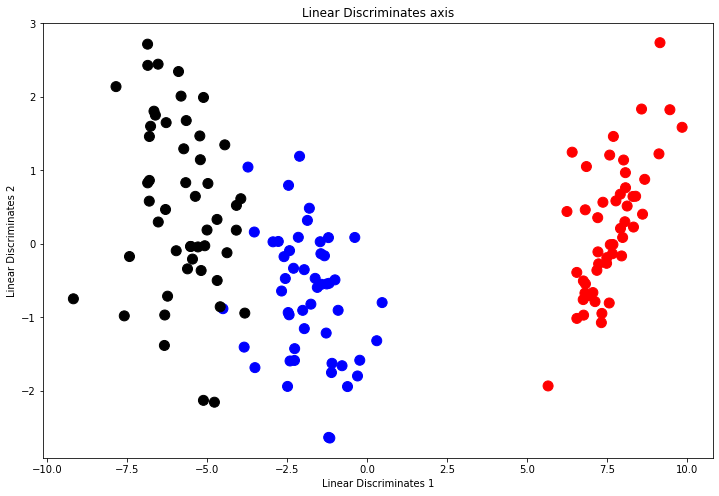

In [ ]:
plt.figure(figsize=(12,8))
colormap=np.array(['red','blue','black'])
plt.scatter(LinearDf.LD1,LinearDf.LD2,c=colormap[LinearDf.Target],s=100)
plt.xlabel("Linear Discriminates 1")
plt.ylabel("Linear Discriminates 2")
plt.title("Linear Discriminates axis")

In [ ]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

<BarContainer object of 2 artists>

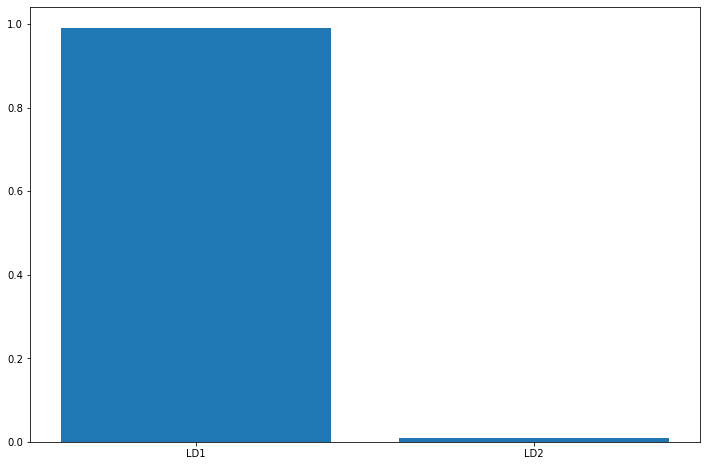

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(['LD1','LD2'],lda.explained_variance_ratio_)

Text(0.5, 1.0, 'Linear Discriminates axis')

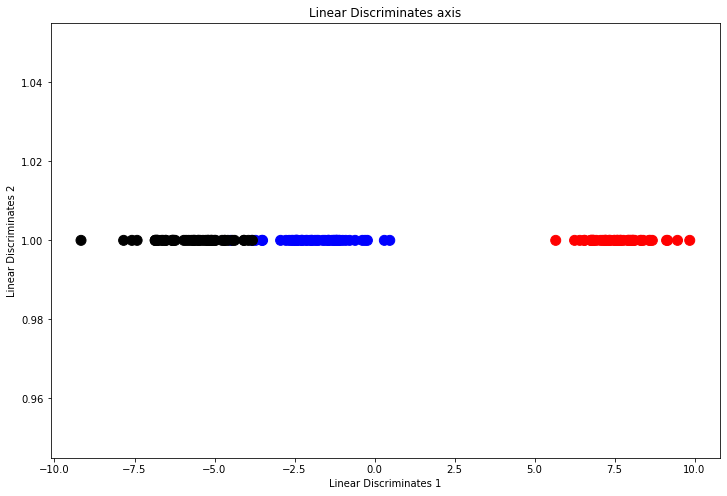

In [ ]:
plt.figure(figsize=(12,8))
colormap=np.array(['red','blue','black'])
plt.scatter(LinearDf.LD1,len(LinearDf.LD2)*[1],c=colormap[LinearDf.Target],s=100)
plt.xlabel("Linear Discriminates 1")
plt.ylabel("Linear Discriminates 2")
plt.title("Linear Discriminates axis")

In [ ]:
lda.explained_variance_ratio_.sum()

0.9999999999999999

150